In [135]:
import matplotlib.pyplot as plt

import numpy as np
import time
from PIL import Image
import struct
from sys import getsizeof

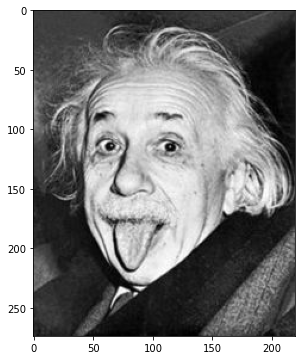

In [136]:
img = Image.open('Einstein_tongue.jpg')
imgconv = img.convert('LA')
plt.figure(figsize=(9, 6))
plt.imshow(imgconv)

[[59. 60. 62. ... 60. 59. 52.]
 [61. 62. 64. ... 60. 58. 51.]
 [61. 63. 64. ... 58. 54. 49.]
 ...
 [47. 42. 40. ... 43. 49. 51.]
 [37. 50. 43. ... 29. 44. 29.]
 [34. 47. 40. ... 23. 46. 38.]]
255.0
Storage memory= 60280


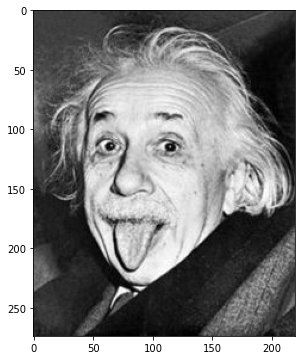

In [137]:
imgmat = np.array(list(imgconv.getdata(band=0)), float)
imgmat.shape = (imgconv.size[1], imgconv.size[0])
imgmat = np.matrix(imgmat)
print(imgmat)
print(np.amax(imgmat)) 
original_st=imgmat.shape[0]*imgmat.shape[1] 
print('Storage memory=',original_st)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray')

In [138]:
print(np.shape(imgmat))
print(imgmat)

(274, 220)
[[59. 60. 62. ... 60. 59. 52.]
 [61. 62. 64. ... 60. 58. 51.]
 [61. 63. 64. ... 58. 54. 49.]
 ...
 [47. 42. 40. ... 43. 49. 51.]
 [37. 50. 43. ... 29. 44. 29.]
 [34. 47. 40. ... 23. 46. 38.]]


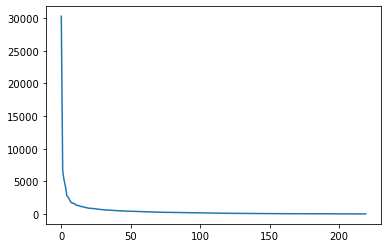

In [139]:
U, sigma, V = np.linalg.svd(imgmat)
#print(sigma)
plt.plot(sigma)

Percent of storage memory= 0.016390179163901793
<function shape at 0x0000018319B114C0>


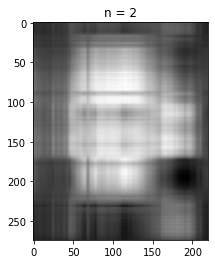

Percent of storage memory= 0.05736562707365627
<function shape at 0x0000018319B114C0>


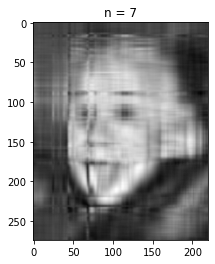

Percent of storage memory= 0.09834107498341076
<function shape at 0x0000018319B114C0>


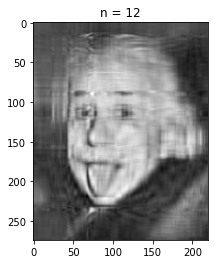

Percent of storage memory= 0.13931652289316523
<function shape at 0x0000018319B114C0>


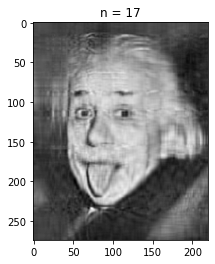

Percent of storage memory= 0.1802919708029197
<function shape at 0x0000018319B114C0>


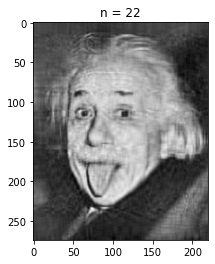

Percent of storage memory= 0.2212674187126742
<function shape at 0x0000018319B114C0>


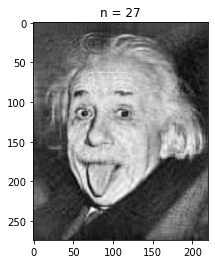

Percent of storage memory= 0.2622428666224287
<function shape at 0x0000018319B114C0>


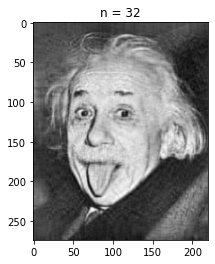

Percent of storage memory= 0.3032183145321831
<function shape at 0x0000018319B114C0>


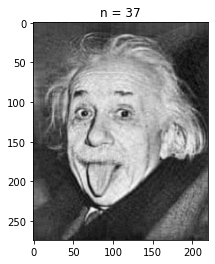

Percent of storage memory= 0.3441937624419376
<function shape at 0x0000018319B114C0>


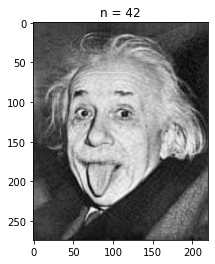

Percent of storage memory= 0.3851692103516921
<function shape at 0x0000018319B114C0>


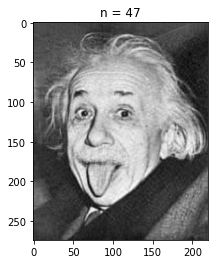

In [140]:
for i in range(2,50,5):
    reconstimg = i+np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    reconstimg_st=np.shape(U[:, :i])[0]*np.shape(U[:, :i])[1]+np.shape(V[:i, :])[0]*np.shape(V[:i, :])[1]
    print('Percent of storage memory=',reconstimg_st/original_st)
    plt.imshow(reconstimg, cmap='gray')
    title = "n = %s" % i
    print(np.shape)
    plt.title(title)
    plt.show()